In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
from pprint import pprint
from srim.srim import SRIM
from srim.core.target import Target
from srim.core.layer import Layer
from srim.core.ion import Ion
from srim.output import (
    Results, Phonons, Ioniz, Vacancy, 
    NoVacancy, EnergyToRecoils, Range
)

In [2]:
def plot_damage_energy(folder, ax):
    phon = Phonons(folder)
    dx = max(phon.depth) / 100.0
    energy_damage = (phon.ions + phon.recoils) * dx
    ax.plot(phon.depth, energy_damage / phon.num_ions, label='{}'.format(folder))
    return sum(energy_damage)

def plot_ionization(folder, ax):
    ioniz = Ioniz(folder)
    dx = max(ioniz.depth) / 100.0
    ax.plot(ioniz.depth, ioniz.ions, label='Ionization from Ions')
    ax.plot(ioniz.depth, ioniz.recoils, label='Ionization from Recoils')
    
def plot_vacancies(folder, ax):
    vac = Vacancy(folder)
    vacancy_depth = vac.knock_ons + np.sum(vac.vacancies, axis=1)
    ax.plot(vac.depth, vacancy_depth, label='{}'.format(folder))
    return sum(vacancy_depth)

# Run a SRIM Calculation

In [3]:
# Run a SRIM calculation
ion = Ion('Ni', energy=3.0e6)
layer = Layer({
        'Ni': {
            'stoich': 1.0, 
            'E_d': 30.0, 
            'lattice': 0.0, 
            'surface': 3.0
        }}, density=8.9, width=20000.0)
target = Target([layer])
srim = SRIM(target, ion, number_ions=10, calculation=1) # Calculation=2 => full cascade
results = srim.run('/tmp/srim')

In [4]:
# Read the data from the calculation
# >>> results = Results('/tmp/srim')
# But we use results returned from srim run in previous cell

print('Number of Ions: {}'.format(results.ioniz.num_ions))

Number of Ions: 10


# Copy SRIM files
Helper function to copy SRIM files from one directory to another. Covers all of the output files.

In [5]:
SRIM.copy_output_files('/tmp/srim', '/home/costrouc/scratch/srim')

# Problem 1
Calculate the damage energy

In [6]:
# dark_background, ggplot, fivethirtyeight, bmh
plt.style.use('bmh')

folders = ['3', '4']

Damage energy: 1277585.5134894948 eV
Damage energy: 1550254.1616235685 eV


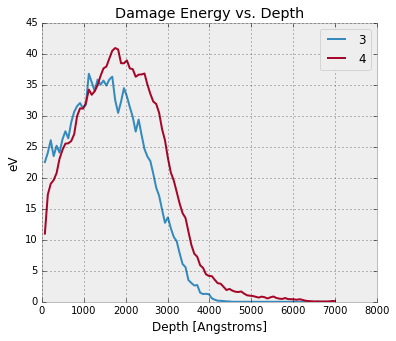

In [5]:
fig, ax = plt.subplots()

for i, folder in enumerate(folders):
    energy_damage = plot_damage_energy(folder, ax)
    print("Damage energy: {} eV".format(energy_damage))

ax.set_xlabel('Depth [Angstroms]')
ax.set_ylabel('eV')
ax.set_title('Damage Energy vs. Depth')
ax.legend()
fig.set_size_inches((6, 5))

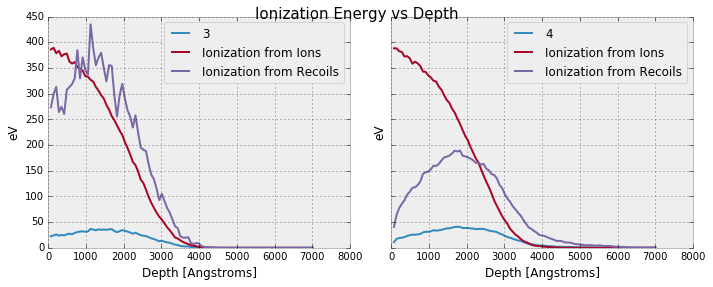

In [6]:
fig, ax = plt.subplots(1, len(folders), sharey=True, sharex=True)

for i, folder in enumerate(folders):
    plot_damage_energy(folder, ax[i])
    plot_ionization(folder, ax[i])
    ax[i].legend()
    ax[i].set_ylabel('eV')
    ax[i].set_xlabel('Depth [Angstroms]')
fig.suptitle('Ionization Energy vs Depth', fontsize=15)
fig.set_size_inches((10, 4))
fig.tight_layout()

Total number of vacancies 3: 305.9062862706999
Total number of vacancies 4: 796.8495827630003


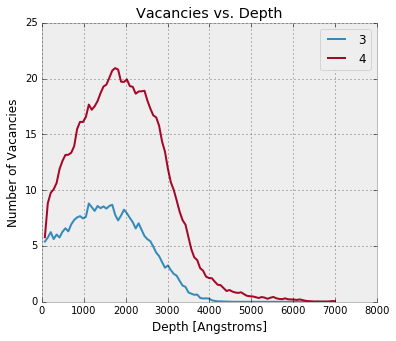

In [7]:
fig, ax = plt.subplots()

for i, folder in enumerate(folders):
    total_vacancies = plot_vacancies(folder, ax)
    print("Total number of vacancies {}: {}".format(
            folder, total_vacancies))

ax.set_xlabel('Depth [Angstroms]')
ax.set_ylabel('Number of Vacancies')
ax.set_title('Vacancies vs. Depth')
ax.legend()
fig.set_size_inches((6, 5))